In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [4]:
df1=pd.read_csv('wine.csv')

### k means clustering: we follow the same process as with hierarchical clustering

In [5]:
df0=df1.drop(columns=['quality'])

In [6]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(df0)

'''scale numeric features now'''
X = ss.transform(df0)

----------------------------------------------------------------------
For n_clusters = 2 The average silhouette_score is : 0.21372996335507305


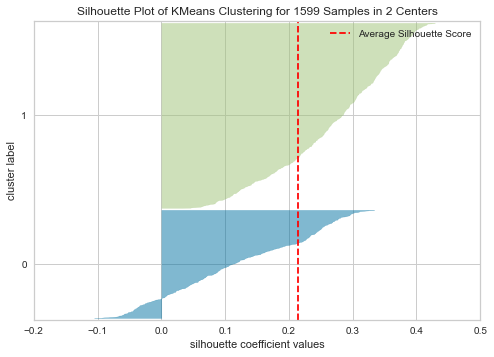

----------------------------------------------------------------------
For n_clusters = 3 The average silhouette_score is : 0.1892101700646274


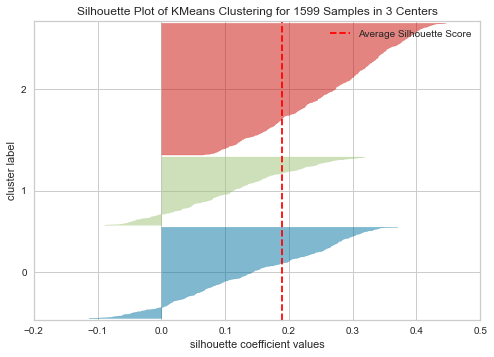

----------------------------------------------------------------------
For n_clusters = 4 The average silhouette_score is : 0.20529638908549816


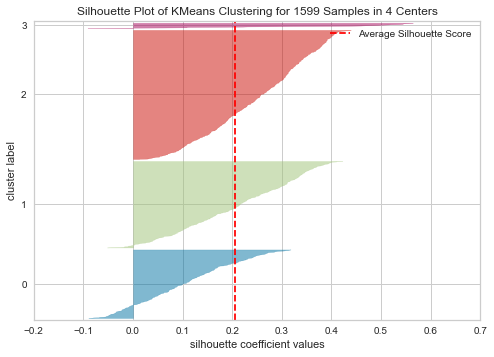

----------------------------------------------------------------------
For n_clusters = 5 The average silhouette_score is : 0.19042186833797473


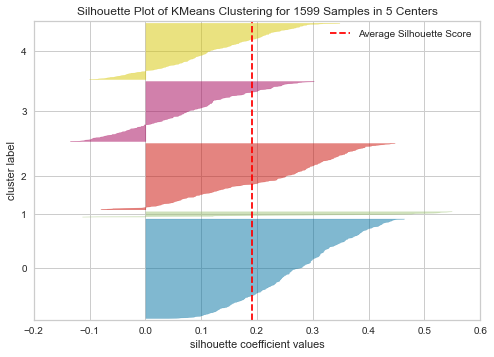

----------------------------------------------------------------------
For n_clusters = 6 The average silhouette_score is : 0.19460751286132327


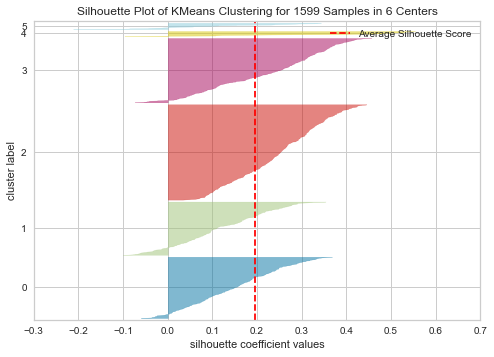

----------------------------------------------------------------------
For n_clusters = 7 The average silhouette_score is : 0.19172805142123855


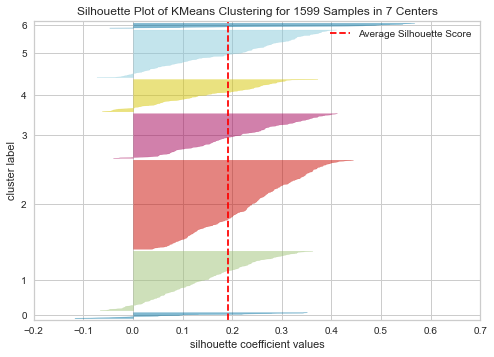

In [7]:
search_name = 'kmeans'

n_clusters = np.arange(2,8,1).tolist()

for n_clusters in n_clusters:
    
    print('-'*70)
    
    model = KMeans()

    param_dict = {'n_clusters': n_clusters,
                  'n_init': 10,
                  'random_state':42,
                 'algorithm':'auto'
                 }

    model.set_params(**param_dict)
    labels = model.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)       
    visualizer.poof()

### silhouette score is unimpressive around 0.2

In [8]:
df_scaled=pd.DataFrame(X,columns=df0.columns)

### we select 4 clusters again

In [9]:
model_kmeans = KMeans(n_clusters=4, random_state=0).fit(df_scaled)

In [10]:
df_scaled['K_means_segments'] =model_kmeans.labels_

In [11]:
cluster_profile = df_scaled.groupby('K_means_segments').mean()

In [12]:
df_scaled = df_scaled.reset_index()
df_scaled.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,K_means_segments
0,0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,3
1,1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,3
3,3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1
4,4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,3


In [17]:
cluster_profile['count_in_each_segment'] = df_scaled.groupby('K_means_segments')['alcohol'].count().values

In [14]:
#df_scaled.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

### cluster 1 has the highest alcohol quantity thus indicating a good quality cluster, however sulphates in cluster 1 is second best

In [15]:
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
K_means_segments,,,,,,,,,,,
0,-0.070421,0.030946,0.126858,0.426629,-0.014903,1.088764,1.311038,0.303500,-0.170318,-0.166272,-0.487698
1,1.030839,-0.749510,1.012290,0.034250,-0.066979,-0.511999,-0.545360,0.410672,-0.680595,0.357068,0.368620
2,0.077869,-0.005162,1.138866,-0.399396,5.694143,-0.067181,0.536282,0.174837,-1.720870,3.565953,-0.876089
3,-0.648859,0.480266,-0.782266,-0.229077,-0.177551,-0.226185,-0.344367,-0.437222,0.608814,-0.293498,0.045661


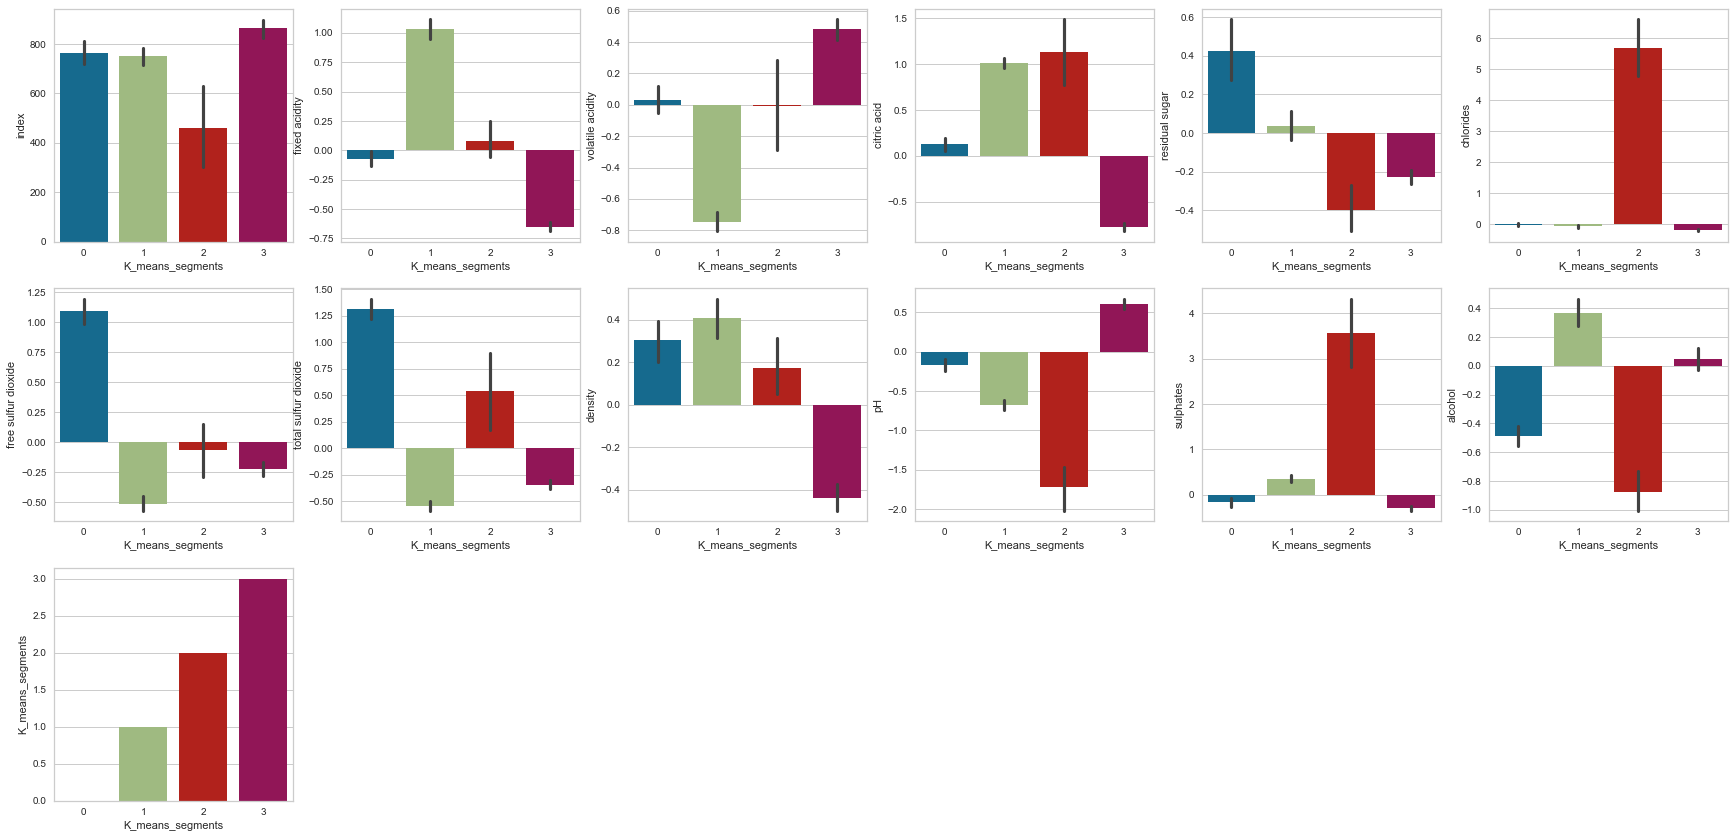

In [16]:
columns = list(df_scaled)

plt.figure(figsize = (30,30))

for i, column in enumerate(columns):
    ax = plt.subplot(6, 6, i + 1) 
    sns.barplot(x = df_scaled['K_means_segments'], y = df_scaled[column], ax=ax)

plt.show()

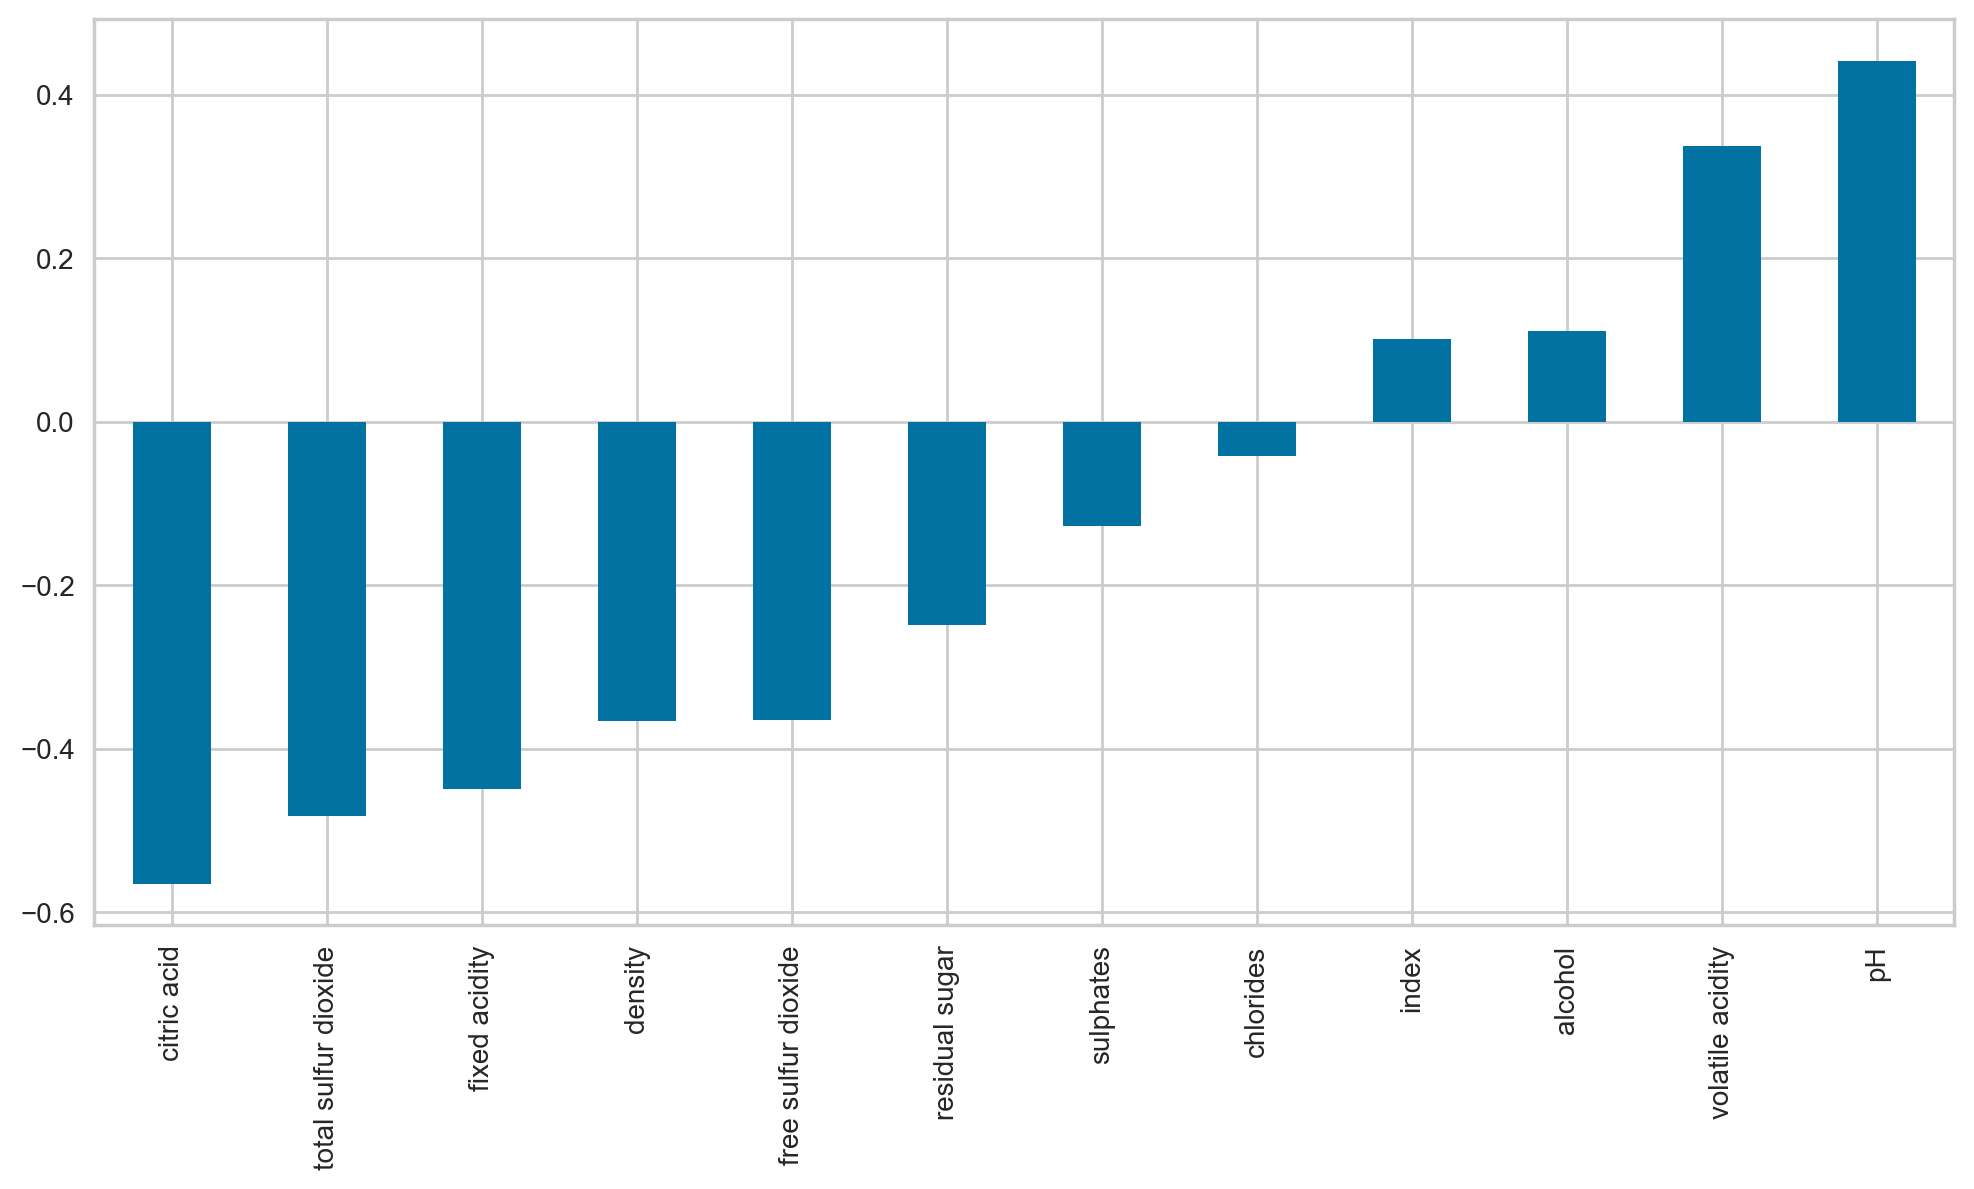

In [17]:
plt.figure(figsize=(12,6),dpi=200)
df_scaled.corr()['K_means_segments'].iloc[:-1].sort_values().plot(kind='bar')

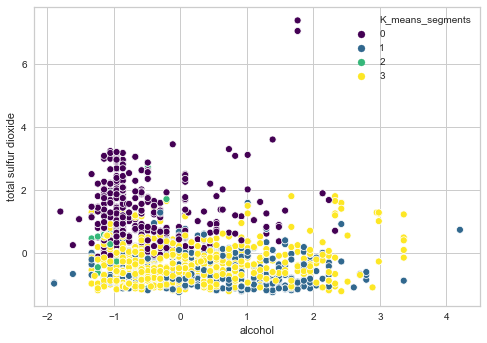

In [18]:
sns.scatterplot(data=df_scaled,x='alcohol',y='total sulfur dioxide',hue=df_scaled['K_means_segments'],palette='viridis')

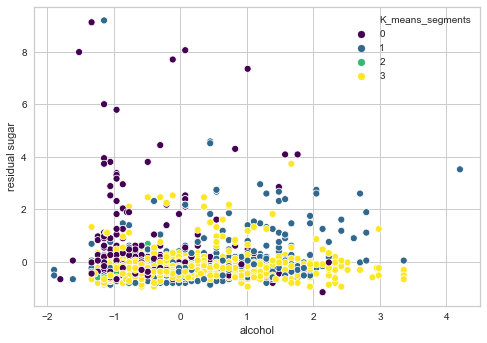

In [19]:
sns.scatterplot(data=df_scaled,x='alcohol',y='residual sugar',hue=df_scaled['K_means_segments'],palette='viridis')

### scatterplots show again the clusters are mixing regarding alcohol vs other variables

In [20]:
df_scaled['quality']=df1['quality'].copy()

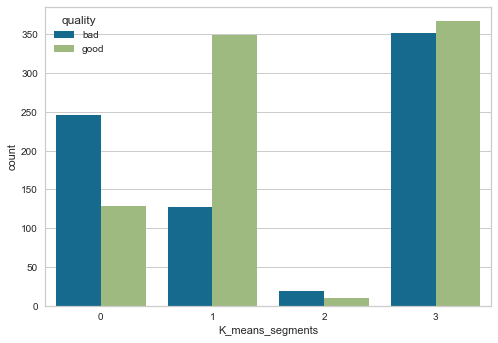

In [21]:
sns.countplot(df_scaled['K_means_segments'],hue=df_scaled['quality'])

### however, here too we see a very small cluster, a cluster that majority is good quality , an even cluster and a cluster mostly with bad quality. Thus clustering did some maybe not perfect, but good job

In [24]:
df4=df_scaled.drop(columns='K_means_segments')

<Figure size 1440x720 with 0 Axes>

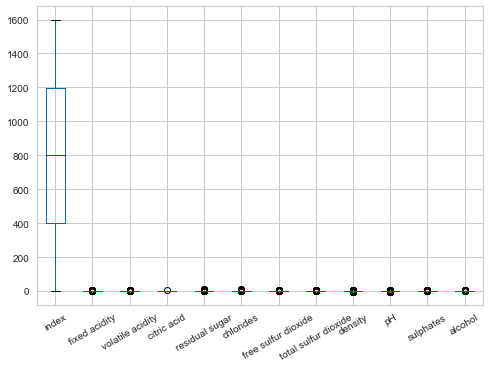

In [25]:
plt.figure(figsize = (20,10))

df4.plot(kind='box');
plt.xticks(rotation=30);

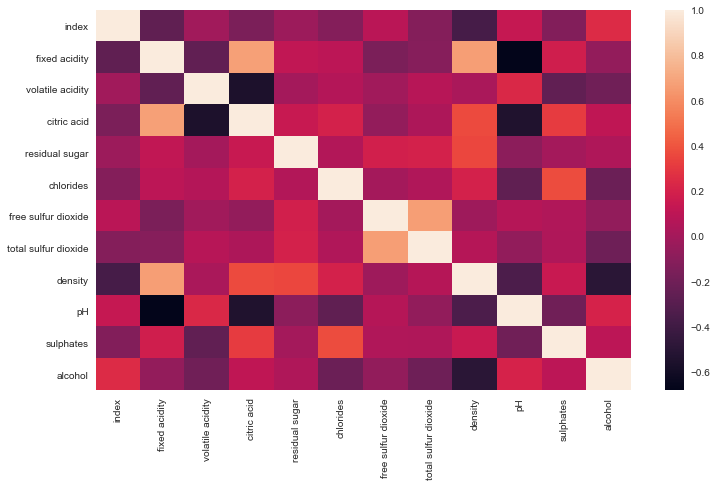

In [26]:
plt.figure(figsize = (12,7))
corr = df4.corr()
sns.heatmap(corr)